## How To Increase Store Sales?

## Introduction

For small businesses like grocery store owner, or supermarket chain store boss gaining sales requires trying out different methods. Some may want to buy an existing store, or invest a new store in a new location, or try different advertisements, but many money can be wasted if one method fails. Therefore, for small business owners, we need to know how to increase store sales effectively. With the data I have, I will analyse this problem with stores in the USA. This analysis can provide actionable insights for store owners and managers who face similar challenges, helping them make better investment and operational decisions.


The objective is to predict monthly store sales revenue based on factors such as product variety, marketing spend, customer footfall, store size, promotions, and other relevant store-related variables. Additionally, I will classify stores as "profitable" or "non-profitable" based on their monthly sales crossing a specified threshold.


My main findings are that, product variety and store size were found to have the most significant positive impact on store sales. To increase sales, store owners should focus on expanding product variety, improving operational efficiency, and carefully managing promotional activities.


## Data Overview

The dataset I used is from Kaggle, that is cited by the author from an original project in UWM. It includes data from different type of stores from some cities in the USA, and included different influencing factors, such as Product Variety, Marketing Spend etc. There are in total 1650 store data. Two of them are object data type, and others are integers or floats. There were enough information to investigate on my research topic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Store_CA.csv")
df.head()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


There are in total 1650 store data collected. There is no null values that we need to deal with. Two of them are object data type, and others are integers or floats.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   int64  
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   object 
 10  StoreCategory        1650 non-null   object 
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 154.8+ KB


In [4]:
#drop rows with null/0 values
df = df.dropna()
df = df[(df != 0).all(axis=1)]

I checked the range of the data. Importantly, our focus on is the range of "Monthly Sales Revenue." It ranges from 65.54 to 534.26 thousand dollars, and its average is 299.25 thousand dollars.

In [5]:
df.describe()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,MonthlySalesRevenue
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,500.915758,27.460000,2020.028485,272.997576,72.198545,15.447879,9.933939,5.500606,99.761939,299.253285
std,148.054223,13.014753,484.025786,131.048595,13.019817,8.667779,3.117450,1.388356,14.614712,65.543755
min,100.000000,5.000000,500.000000,50.000000,50.000000,1.000000,1.000000,3.000000,60.000000,106.710000
25%,396.000000,17.000000,1691.000000,156.000000,61.000000,8.000000,8.000000,4.000000,90.000000,254.125000
50%,500.500000,27.000000,2021.000000,273.000000,72.100000,16.000000,10.000000,5.000000,100.300000,297.440000
75%,602.750000,38.000000,2350.750000,385.500000,83.100000,23.000000,12.000000,7.000000,109.600000,344.222500
max,1092.000000,50.000000,3627.000000,500.000000,94.900000,30.000000,20.000000,8.000000,140.000000,534.260000


In [6]:
store_locations=df['StoreLocation'].unique()
print(store_locations)
n_loc=len(store_locations)

['Los Angeles' 'Sacramento' 'Palo Alto' 'San Francisco']


In [7]:
store_types=df['StoreCategory'].unique()
print(store_types)
n_typ=len(store_types)

['Electronics' 'Grocery' 'Clothing']


The majority of the monthly sales data is concentrated in the 300–350 range.

Text(0.5, 1.0, 'Monthly Sales Revenue Distribution of Super Stores')

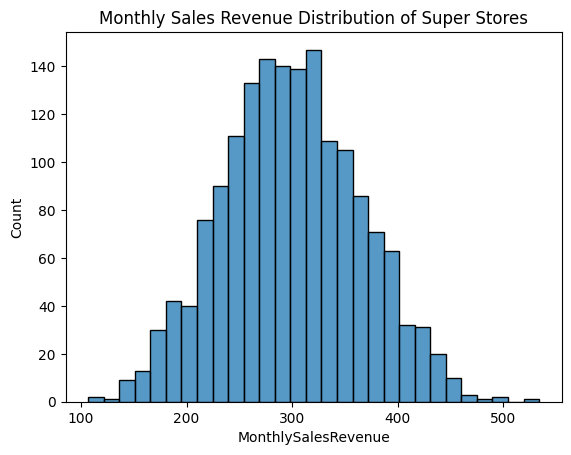

In [8]:
#histogram of monthly revenue
sns.histplot(data = df, x = 'MonthlySalesRevenue')
plt.title('Monthly Sales Revenue Distribution of Super Stores')

After seeing the overall sales number distribution, I would like to see how monthly sales is distributed for the different types of stores. From the chart, we can tell that all three categories show relatively symmetric, bell-shaped distributions, hinting at potential normality. The central ranges are similar, with grocery stores having a slightly narrower spread, suggesting more consistent sales. Clothing stores exhibit the widest range, potentially reflecting greater variation in revenue influenced by external factors like fashion trends or promotional events. They are similar in general.

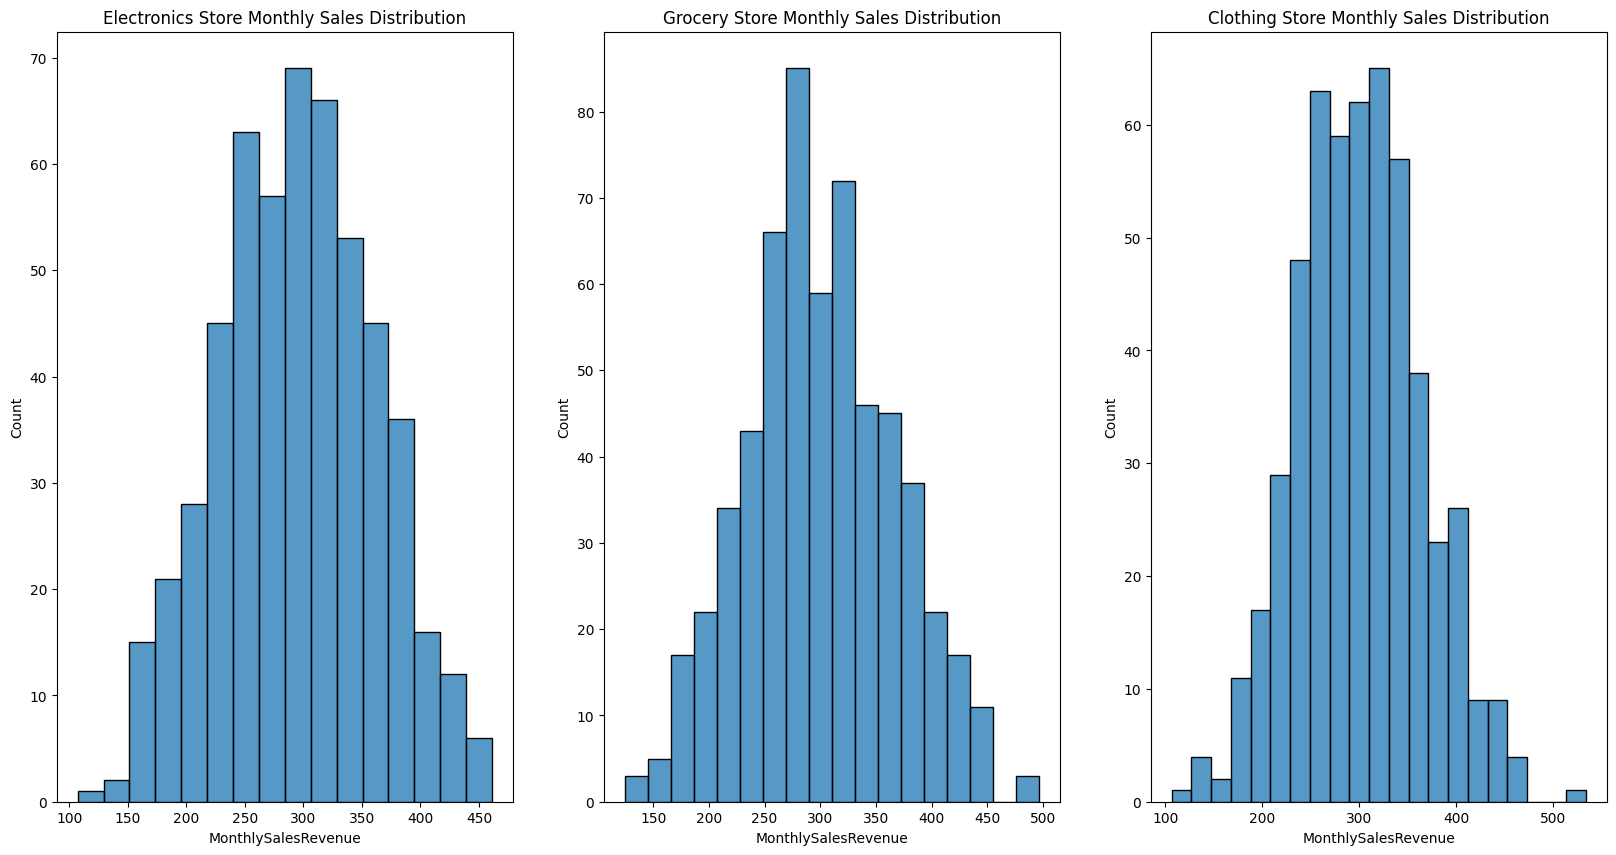

In [9]:
n=0
fig, ax = plt.subplots(1, n_typ, figsize = (20, 10))
for v in store_types:
    sns.histplot(data=df[df['StoreCategory']==v], x='MonthlySalesRevenue', ax=ax[n])
    ax[n].set_title('{} Store Monthly Sales Distribution'.format(v))
    n+=1

I checked the different cities. All cities exhibit approximately normal distributions in sales revenue. The central range (~250–350 units) is consistent across all locations, indicating that most stores perform similarly in revenue. Sacramento shows the narrowest range, indicating more consistency. Palo Alto and Los Angeles have slightly broader ranges, suggesting variability in performance.

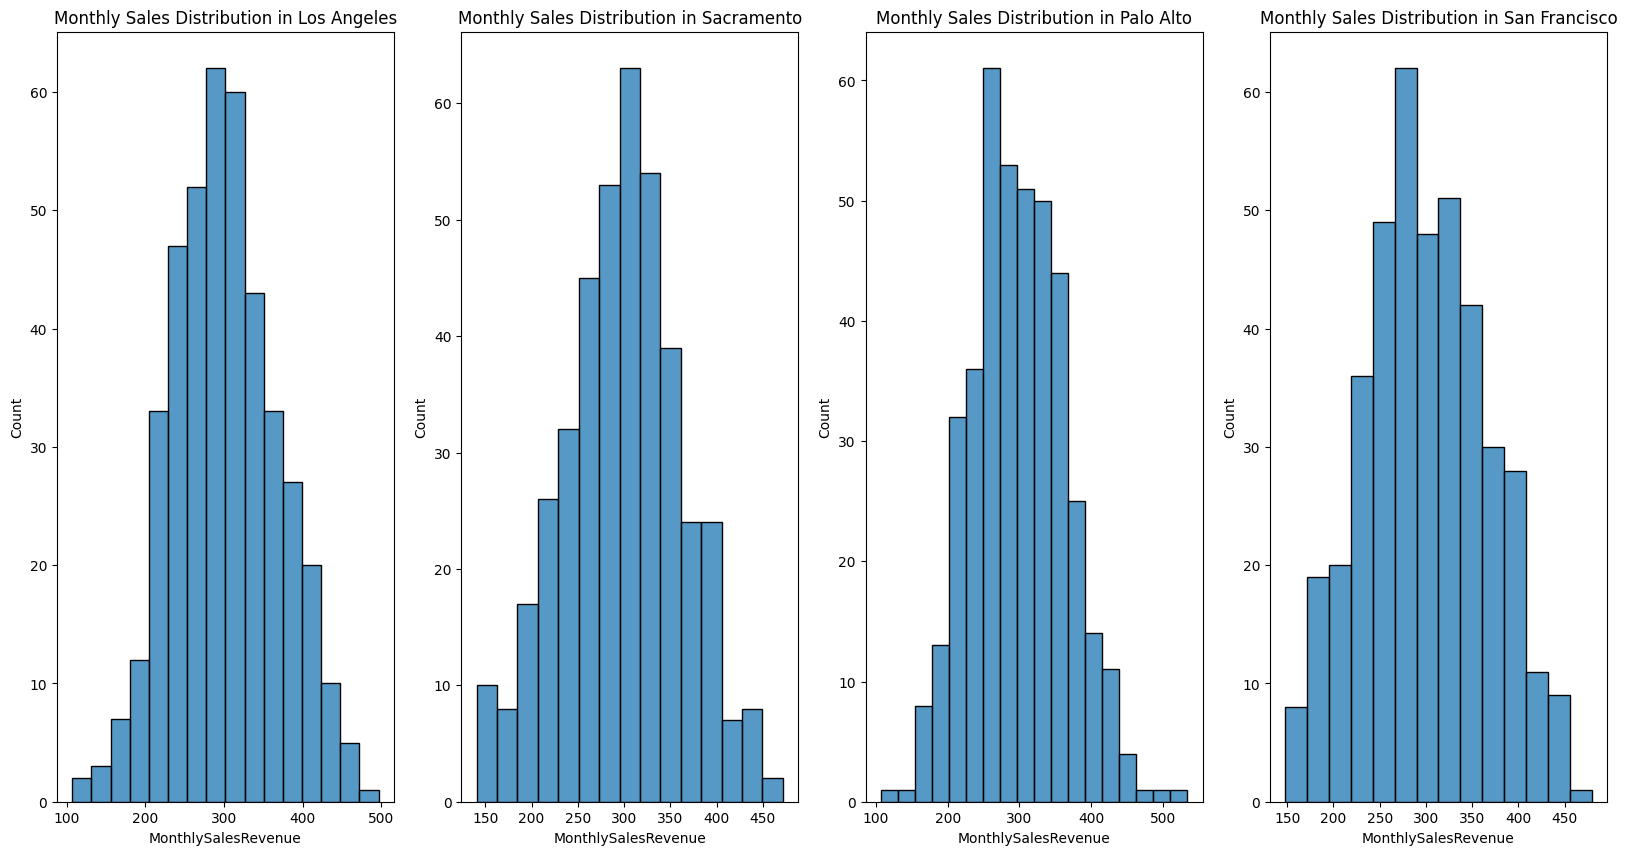

In [10]:
n=0
fig, ax = plt.subplots(1, n_loc, figsize = (20, 10))
for v in store_locations:
    sns.histplot(data=df[df['StoreLocation']==v], x='MonthlySalesRevenue', ax=ax[n])
    ax[n].set_title('Monthly Sales Distribution in {}'.format(v))
    n+=1

### Data Visualization

In this part, I tried to visualize the relationship between variables to learn more about the problem I wanted to solve.

There seems to be an almost linear positive relationship between monthly sales and product variety.

Text(0.5, 1.0, 'Product Variety and Monthly Sales')

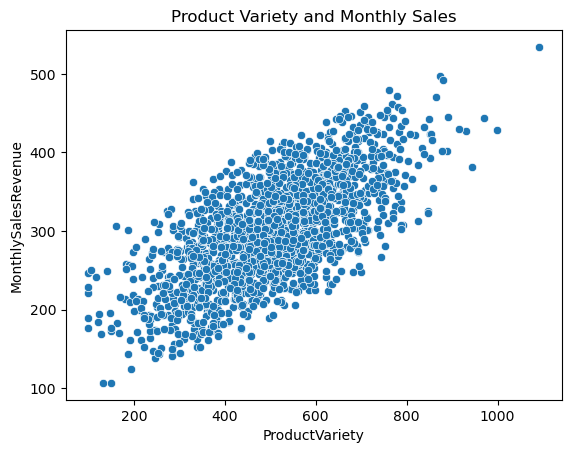

In [ ]:
sns.scatterplot(data = df, x = 'ProductVariety', y = 'MonthlySalesRevenue')
plt.title('Product Variety and Monthly Sales')

There is a clear positive trend, suggesting that as Store Size increases, Monthly Sales Revenue also tends to increase. A few points deviate significantly from the trend, which need to be checked.

Text(0.5, 1.0, 'Store Size and Monthly Sales')

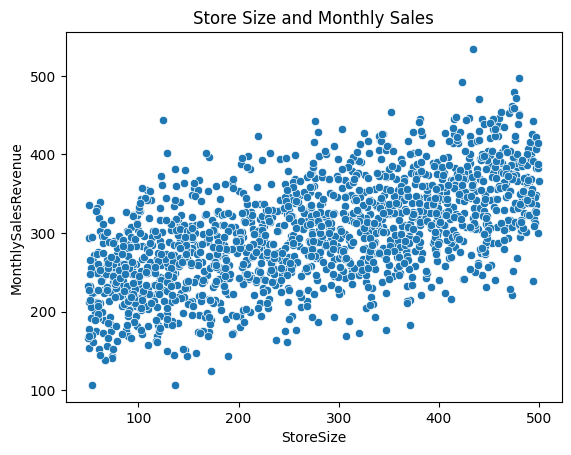

In [11]:
sns.scatterplot(data = df, x = 'StoreSize', y = 'MonthlySalesRevenue')
plt.title('Store Size and Monthly Sales')

One thing to notice is that, from the scatter plot of marketing spend and monthly sales, I can see there might no strong relationship between monthly sales revenue and the marketing spend. This is interesting because we may assume that if we spend more money on marketing, we could attract more customers, and thus sell more. From the data stand point, this may not be exactly true.

Text(0.5, 1.0, 'Marketing Spend and Monthly Sales')

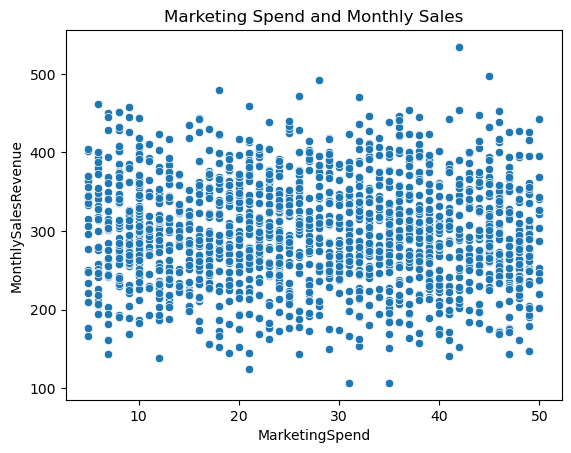

In [ ]:
sns.scatterplot(data = df, x = 'MarketingSpend', y = 'MonthlySalesRevenue')
plt.title('Marketing Spend and Monthly Sales')

For the rest of the variables like customer footfall, employee efficiency, store age, and economic indicator, they mostly do not show clear relationship with monthly sales.

Text(0.5, 1.0, 'Customer Footfall and Monthly Sales')

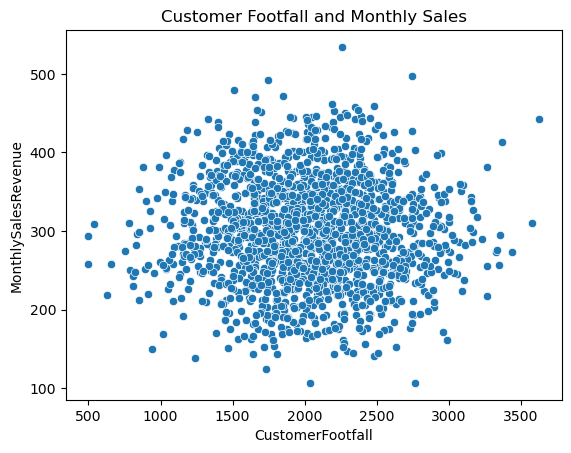

In [ ]:
sns.scatterplot(data = df, x = 'CustomerFootfall', y = 'MonthlySalesRevenue')
plt.title('Customer Footfall and Monthly Sales')

Text(0.5, 1.0, 'Employee Efficiency and Monthly Sales')

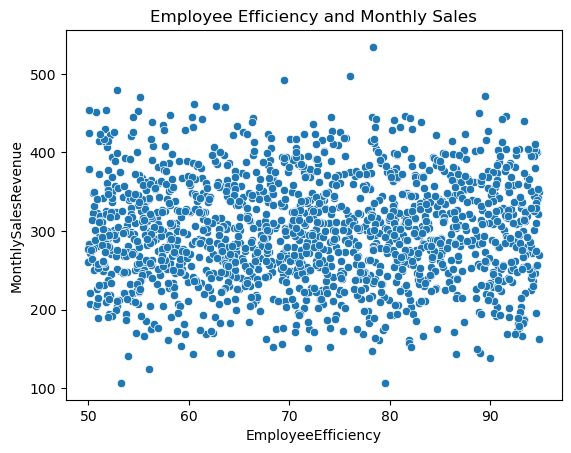

In [ ]:
sns.scatterplot(data = df, x = 'EmployeeEfficiency', y = 'MonthlySalesRevenue')
plt.title('Employee Efficiency and Monthly Sales')

Text(0.5, 1.0, 'Store Age and Monthly Sales')

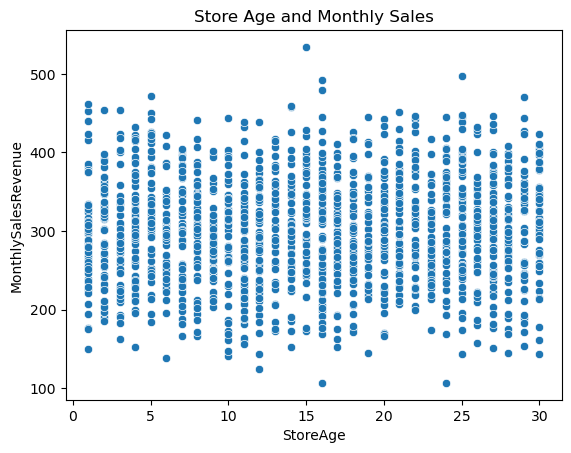

In [ ]:
sns.scatterplot(data = df, x = 'StoreAge', y = 'MonthlySalesRevenue')
plt.title('Store Age and Monthly Sales')

Text(0.5, 1.0, 'Economic Indicator and Monthly Sales')

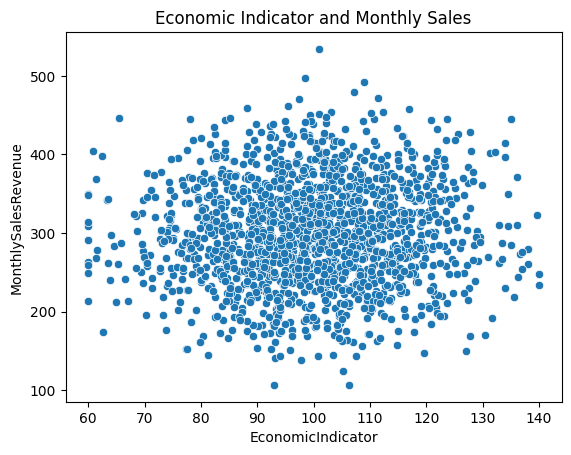

In [12]:
sns.scatterplot(data = df, x = 'EconomicIndicator', y = 'MonthlySalesRevenue')
plt.title('Economic Indicator and Monthly Sales')

Surprisingly, competitor distance seems not important either. The competitors with distance below 15km does not show a clear influence to the store monthly sales number. Competitor distances greater than 15Km shows some decrease, this may mean the area is too far from downtown, and the population is less dense than the other areas, so the monthly sales could be low.

Text(0.5, 1.0, 'Competitor Distance and Monthly Sales')

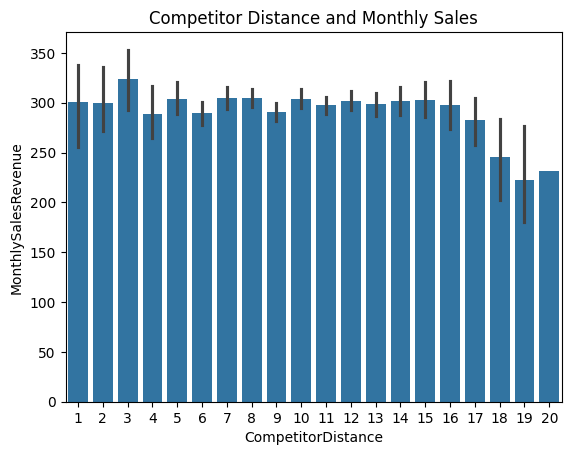

In [57]:
sns.barplot(data = df, x = 'CompetitorDistance', y = 'MonthlySalesRevenue')
plt.title('Competitor Distance and Monthly Sales')

Sales remains relatively stable across different promotion counts, making the difference small. However, this does not mean we can simply cut off all the promotion activities.

Text(0.5, 1.0, 'Promotion Count and Monthly Sales')

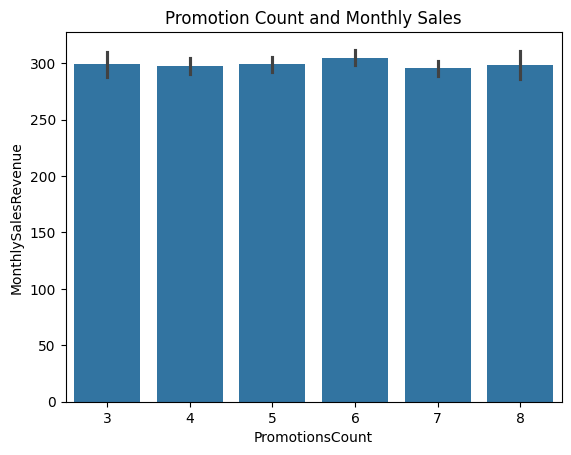

In [58]:
sns.barplot(data = df, x = 'PromotionsCount', y = 'MonthlySalesRevenue')
plt.title('Promotion Count and Monthly Sales')

From this chart, we can see the promotion intensity are very similar. Most stores have 4-7 times promotion a month. Although we see "insignificant" influence of promotions count to monthly sales revenue, still if we cut the promotions, it may put us in a disadvantage in the competition. So, this might be a tricky decision.

Text(0.5, 1.0, 'Promotions Count Distribution')

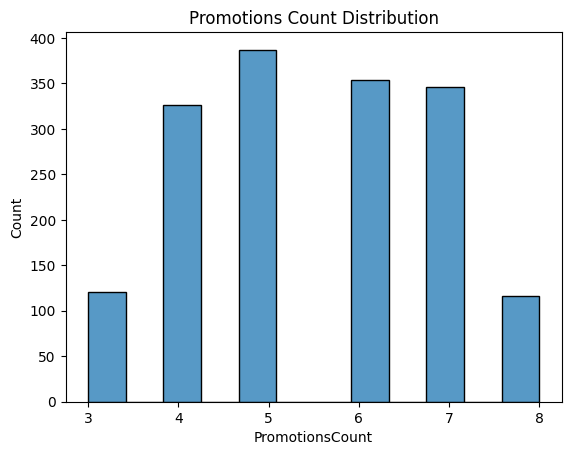

In [59]:
sns.histplot(data=df, x='PromotionsCount')
plt.title('Promotions Count Distribution')

To summarize, I will analyse the heat chart showing coefficients between variables.

<Axes: >

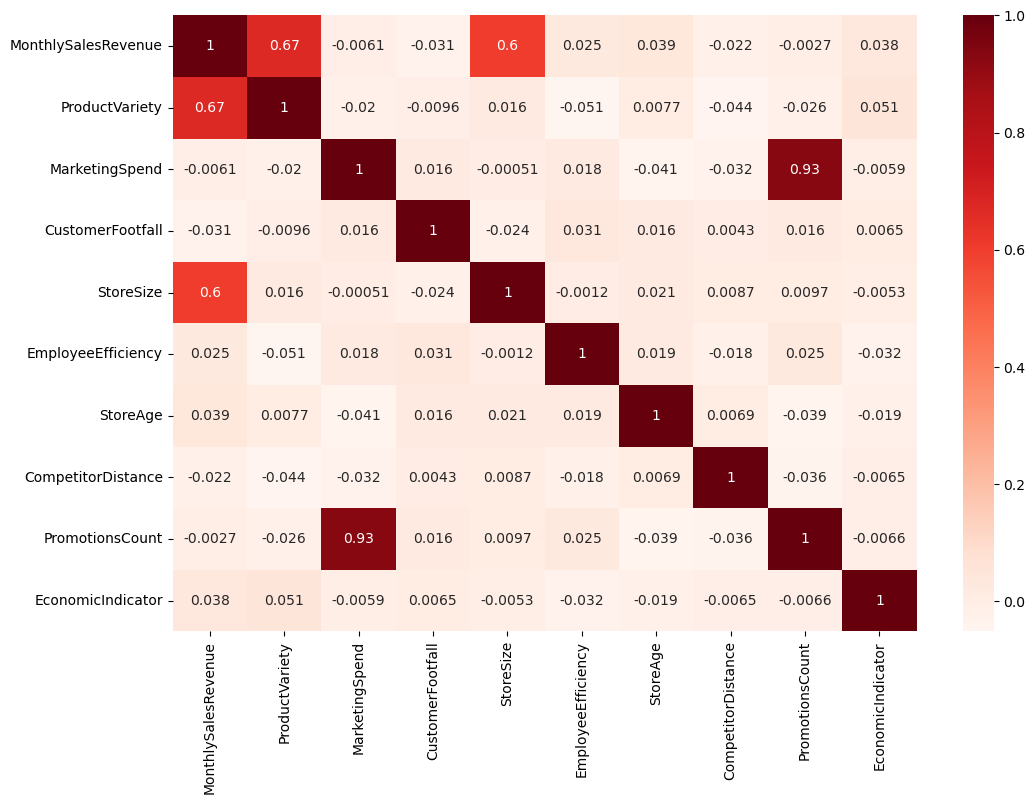

In [ ]:
df_num=df[['MonthlySalesRevenue','ProductVariety', 'MarketingSpend', 'CustomerFootfall','StoreSize','EmployeeEfficiency','StoreAge','CompetitorDistance', 'PromotionsCount','EconomicIndicator']]
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot = True, cmap = 'Reds')

This is pretty in-line with what we found in the individual scatter plots.
For monthly sales revenue, the strongest correlations are:

*   ProductVariety (0.67) has strong positive correlation with monthly sales revenue. Stores offering a greater variety of products tend to achieve higher revenue.
*   StoreSize (0.6) has strong positive correlation. Larger stores are associated with higher sales revenue, which aligns with earlier scatter plot observations.
*   Other variables have minimal correlation with sales, indicating weak or no linear relationship.
* Product variety, store size, employee efficiency, store age and economic indicator positively impact revenue, reflecting their importance in operational success and influence of pre-determined factors.


## Modelling and Interpretation

### Stats Model(OLS)

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


I used stats model OLS to view more detailed summary of the regression results and check the validity.

We will need to deal with the categorical parameters: Store Location and Store Category. We simply use get_dummies to make them boolean values.

In [15]:
df1=pd.get_dummies(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProductVariety               1650 non-null   int64  
 1   MarketingSpend               1650 non-null   int64  
 2   CustomerFootfall             1650 non-null   int64  
 3   StoreSize                    1650 non-null   int64  
 4   EmployeeEfficiency           1650 non-null   float64
 5   StoreAge                     1650 non-null   int64  
 6   CompetitorDistance           1650 non-null   int64  
 7   PromotionsCount              1650 non-null   int64  
 8   EconomicIndicator            1650 non-null   float64
 9   MonthlySalesRevenue          1650 non-null   float64
 10  StoreLocation_Los Angeles    1650 non-null   bool   
 11  StoreLocation_Palo Alto      1650 non-null   bool   
 12  StoreLocation_Sacramento     1650 non-null   bool   
 13  StoreLocation_San 

In [16]:
# convert "bool" value to "float" values
df2=df1.astype('float')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProductVariety               1650 non-null   float64
 1   MarketingSpend               1650 non-null   float64
 2   CustomerFootfall             1650 non-null   float64
 3   StoreSize                    1650 non-null   float64
 4   EmployeeEfficiency           1650 non-null   float64
 5   StoreAge                     1650 non-null   float64
 6   CompetitorDistance           1650 non-null   float64
 7   PromotionsCount              1650 non-null   float64
 8   EconomicIndicator            1650 non-null   float64
 9   MonthlySalesRevenue          1650 non-null   float64
 10  StoreLocation_Los Angeles    1650 non-null   float64
 11  StoreLocation_Palo Alto      1650 non-null   float64
 12  StoreLocation_Sacramento     1650 non-null   float64
 13  StoreLocation_San 

In [19]:
#due to the change of data types, reset the X and y values as X2, y2, and split again
X2=df2.drop('MonthlySalesRevenue',axis=1)
y2 = df2['MonthlySalesRevenue']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [20]:
stats = sm.OLS(y2_train, X2_train).fit()
print(stats.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlySalesRevenue   R-squared:                       0.809
Model:                             OLS   Adj. R-squared:                  0.807
Method:                  Least Squares   F-statistic:                     395.0
Date:                 Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                         01:55:57   Log-Likelihood:                -6291.6
No. Observations:                 1320   AIC:                         1.261e+04
Df Residuals:                     1305   BIC:                         1.269e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
ProductV

I added the intercepts for the regression to make it more accurate.

In [21]:
X2_train = sm.add_constant(X2_train)
stats2 = sm.OLS(y2_train, X2_train).fit()
print(stats2.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlySalesRevenue   R-squared:                       0.809
Model:                             OLS   Adj. R-squared:                  0.807
Method:                  Least Squares   F-statistic:                     395.0
Date:                 Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                         01:56:00   Log-Likelihood:                -6291.6
No. Observations:                 1320   AIC:                         1.261e+04
Df Residuals:                     1305   BIC:                         1.269e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const   

From the regression table, we can tell:
*   ProductVariety, StoreSize, EmployeeEfficiency are the statistically significant variables, and they dominant predictors positively influencing Monthly Sales Revenue.
*   Store Locations and Store Categories were also statistically significant. We can observe that discernable differences exist between locations and store categories, with San Francisco, Electronics, and Clothing stores showing higher performance.
*   Other factors like MarketingSpend, CompetitorDistance, PromotionsCount, EconomicIndicator have p-values > 0.05, indicating they do not contribute significantly to the model, which did fit our preliminary exploration.

Some key regression metrics include R^2, F-stat and condition number.  

*   R^2: the model explains 80.9% of the variance in Monthly Sales Revenue, indicating a strong fit to the data.
*   F-statistic: shows that overall model is statistically significant
*   Condition number: 1.41e+19 is quite high, signaling multicollinearity among predictors. This can make some coefficients unstable and less reliable.


In terms of model validity, the strengths are its high R^2 and adjusted R^, they show the model fits the data well. However, the big weaknesses is its multicollinearity. This means there is a high correlation among predictors, that reduces confidence in individual coefficient estimates. Some predictors like MarketingSpend, PromotionsCount) are unexpectedly insignificant, which can be caused by either poor feature quality or multicollinearity masking their impact.


### Linear Regression with sklearn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.inspection import permutation_importance

We build a baseline model to predict all the sales based on average sales. And, based on this, the MSE is 4293. This will be the base line that the other models will compare with.

In [23]:
y=df['MonthlySalesRevenue']
baseline_pre=np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_pre)

4293.380211391588

Then, I ran the multivariate linear regression. From the coefficients, we can see: PromotionsCount, EmployeeEfficiency, ProductVariety, StoreSize, StoreAge has relatively higher numbers. Also, from store location’s standpoint, San Francisco is better as it has a higher and positive coefficient. This might be due to how fierce the competition level is in the cities. And, from store type perspective, clothing stores have higher coefficients, while grocery stores have lower.

These findings are somehow different from what we observed purely from the scatter plots and bar plots. This regression is giving us more complete and accurate information. For example, from scatter plot, we did not see big difference or strong correlation between promotions count with monthly sales revenue, but this regression model tells us that the coefficient is relatively high. Same with employee efficiency and store age.

In [26]:
#X will be columns except "MonthlySalesRevenue", and y will be the MonthlySalesRevenue, then we will split the data to training set and test set by
# and 20%
X=df1.drop('MonthlySalesRevenue',axis=1)
y = df1['MonthlySalesRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
model=LinearRegression()
lr=model.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,ProductVariety,0.293083
1,MarketingSpend,-0.058458
2,CustomerFootfall,-0.001471
3,StoreSize,0.293761
4,EmployeeEfficiency,0.346748
5,StoreAge,0.183889
6,CompetitorDistance,0.068662
7,PromotionsCount,1.035200
8,EconomicIndicator,0.057532
9,StoreLocation_Los Angeles,-0.559664


Next, we evaluate the model score and MSE.

As we see the MSE is 808 on training dataset and 848 on test data set. This is very much improved vs. our baseline model, which had a MSE of 4293. These test and training MSE numbers are quite close, which means the model performed almost equally well on training dataset and test dataset. There is not much over-fitting or under-fitting issue. The R^2 score of 0.813 shows the model captures most of the variability in the data, making it a reliable predictive model for Monthly Sales Revenue. To further improve, one might consider adding interaction terms, non-linear transformations, or more features, to capture potential non-linear relationships.

In [28]:
lr.intercept_

37.35092145157796

In [29]:
y_train_preds = model.predict(X_train)
mean_squared_error(y_train, y_train_preds)

808.1803273893385

In [30]:
y_test_preds = model.predict(X_test)
mean_squared_error(y_test, y_test_preds)

847.8514491720416

In [31]:
model.score(X_test, y_test)

0.8129721784426358

To summarize,
I looked at the importance of each factor:


*   Dominance of ProductVariety and StoreSize: The results highlight that these two features are crucial drivers of sales, as they strongly influence the model's accuracy.

*   Low Impact of External Factors: Features like CompetitorDistance, EconomicIndicator, and even MarketingSpend contribute minimally, suggesting internal store operations (e.g., variety and size) are more critical than external factors.
*   Actionable Focus: Businesses should focus on increasing product variety and optimizing store size to improve sales. Less emphasis might be placed on external competition or promotional efforts unless coupled with other strategies.


In [32]:
imp = permutation_importance(model, X_test, y_test, n_repeats = 10)
pd.DataFrame(imp['importances_mean'], index = X_train.columns.tolist())

,0
ProductVariety,0.970317
MarketingSpend,0.000656
CustomerFootfall,0.000737
StoreSize,0.663547
EmployeeEfficiency,0.004264
StoreAge,-0.000197
CompetitorDistance,-0.000005
PromotionsCount,-0.000074
EconomicIndicator,-0.000381
StoreLocation_Los Angeles,0.000088


### KNN Regressor

I also used KNN regressor to see how well the model is compared to the linear one.

The training MSE is 697.35 and testing MSE is 1074.44. The training MSE is lower than the linear regressor in sklearn. However, the testing dataset’s MSE is a bit high. This might mean the regressor built a model that "over-fit" model based on the training set, when it applies to test set, it does not fit very well. As a result, not surprisingly, the model score is 0.76, the KNN model explains 76.29% of the variance in the target variable for the test set, This is not a bad score, but it is relatively lower than the sklearn linear regression model.  It indicates that the model is reasonably effective but less robust than linear regression for this dataset.

In [40]:
knnmodel=KNeighborsRegressor()
knnmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
y_train_preds = knnmodel.predict(X_train)
mean_squared_error(y_train, y_train_preds)

697.3511295333332

In [42]:
y_test_preds = knnmodel.predict(X_test)
mean_squared_error(y_test, y_test_preds)

1074.442749006061

In [43]:
knnmodel.score(X_test, y_test)

0.7629883313510342

I tried to improve the parameters in KNN model, to improve the performance.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,16)]

    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,16)],
        'p':[i for i in range(1,6)]
    }
]

In [46]:
grid = GridSearchCV(knnmodel,param_grid,n_jobs = -1,verbose = 1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [47]:
grid.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

0.7589 is a solid cross-validation score, confirming that the KNN model performs consistently across different folds of data.

In [48]:
grid.best_score_

0.7589112313571803

In [49]:
grid.best_estimator_

KNeighborsRegressor(n_neighbors=10, weights='distance')

The final R^2 score of 0.761 on the test set shows that the optimized KNN model captures approximately 76.1% of the variance in the target variable. While this is a solid result, the performance is slightly lower than the linear regression model, suggesting that linear relationships dominate the dataset.

In [50]:
grid.best_estimator_.score(X_test, y_test)

0.761858724374402

To summarize, I looked at the importance of the factors again.  

*   Dominant Features: The two dominant predictors are ProductVariety and StoreSize, which collectively explain most of the variation in sales revenue. This is in line with what we found out earlier.
*   Minimal Impact Features: Factors such as Marketing Spend, Promotions Count, and Employee Efficiency appear to have minimal influence on sales. This suggests these features may not directly drive revenue, or their impact could be masked by other variables.

*   Irrelevant Features: Features like Competitor Distance, Store Locations, and Store Categories were deemed unimportant, indicating that sales are not significantly affected by store geography or category in this particular dataset.


In [51]:
imp1 = permutation_importance(knnmodel, X_test, y_test, n_repeats = 10)
pd.DataFrame(imp1['importances_mean'], index = X_train.columns.tolist())

,0
ProductVariety,0.815084
MarketingSpend,0.005519
CustomerFootfall,0.028386
StoreSize,0.614937
EmployeeEfficiency,0.004847
StoreAge,0.004741
CompetitorDistance,-0.000596
PromotionsCount,0.000471
EconomicIndicator,0.001708
StoreLocation_Los Angeles,0.000000


####Results and Model Comparison

Above, we have done a study using different regression models: statsmodel OLS model, sklearn linear regression, KNN model to develop a prediction model to understand the relationship between the different factors and monthly sales revenue. The results slightly differ, but mostly agree that store size and product variety are the most important factors.

In comparison, in terms of performance, linear models (StatsModels OLS and Sklearn Linear Regression) outperform KNN on this dataset, achieving higher R^2and lower MSE. In terms of interpretability, stats model OLS excels in interpretability due to statistical summaries, helping identify significant predictors. In terms of handling complexity, KNN is more flexible for capturing non-linear relationships. However, it underperforms here because the data shows strong linear trends.


## Extension: Make It A Logistic Regression Problem

Assume in our survey of store data, we can only know whether the store is making profit or not, and store owners don't want to share the exact numbers of their monthly sales revenue.  For practice reason, let's try to make it a logistic regression problem.  The problem is: if we will invest a new store (or buy a existing store), are we going to make profit or not?

Then, let's assume the breakeven line for monthly sales is 250.  And, we make the 'MonthlySalesRevenue' a binary data.

In [34]:
#make the sales revenue a binary data
df3=df2
df3['binary_sales']=np.where(df3['MonthlySalesRevenue']>=250.0, 1,0)
df3.drop('MonthlySalesRevenue', axis=1, inplace=True)
df3.describe()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation_Los Angeles,StoreLocation_Palo Alto,StoreLocation_Sacramento,StoreLocation_San Francisco,StoreCategory_Clothing,StoreCategory_Electronics,StoreCategory_Grocery,binary_sales
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,500.915758,27.460000,2020.028485,272.997576,72.198545,15.447879,9.933939,5.500606,99.761939,0.252727,0.246667,0.249697,0.250909,0.320000,0.324242,0.355758,0.768485
std,148.054223,13.014753,484.025786,131.048595,13.019817,8.667779,3.117450,1.388356,14.614712,0.434708,0.431202,0.432969,0.433668,0.466618,0.468233,0.478887,0.421929
min,100.000000,5.000000,500.000000,50.000000,50.000000,1.000000,1.000000,3.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,396.000000,17.000000,1691.000000,156.000000,61.000000,8.000000,8.000000,4.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,500.500000,27.000000,2021.000000,273.000000,72.100000,16.000000,10.000000,5.000000,100.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,602.750000,38.000000,2350.750000,385.500000,83.100000,23.000000,12.000000,7.000000,109.600000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1092.000000,50.000000,3627.000000,500.000000,94.900000,30.000000,20.000000,8.000000,140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
X3=df3.drop('binary_sales',axis=1)
y3=df3['binary_sales']

In [36]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 42)

The prediction model works pretty well with a score of 0.85. And, both training data score and testing data set score are very close to each other, the test data score is even slightly higher. This shows there is probably no "over-fitting" concern.

In [37]:
clf=LogisticRegression()
clf.fit(X3_train, y3_train)
print(f'Train Score: {clf.score(X3_train, y3_train)}')
print(f'Test Score: {clf.score(X3_test, y3_test)}')

Train Score: 0.8536782538399353
Test Score: 0.87409200968523


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I also graphed the confusion matrices of training and test datasets. We can also tell the confusion matrix of the model for both training dataset and test dataset. From the data, we can see again, the prediction accuracy is pretty good. The model correctly predicts a high proportion of positive cases (profit stores) while making fewer errors on negative cases. The accuracy is robust across training and test datasets.

Text(0.5, 1.0, 'Confusion Matrix for Test Dataset')

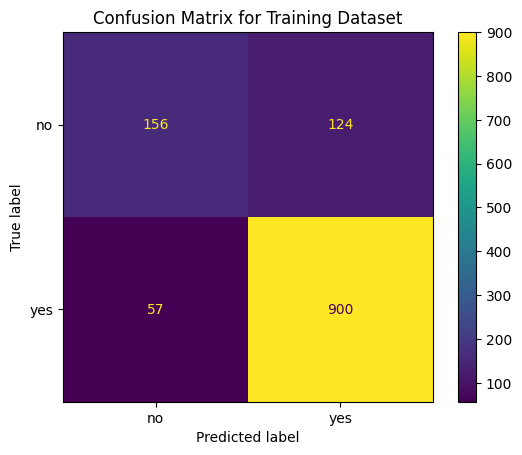

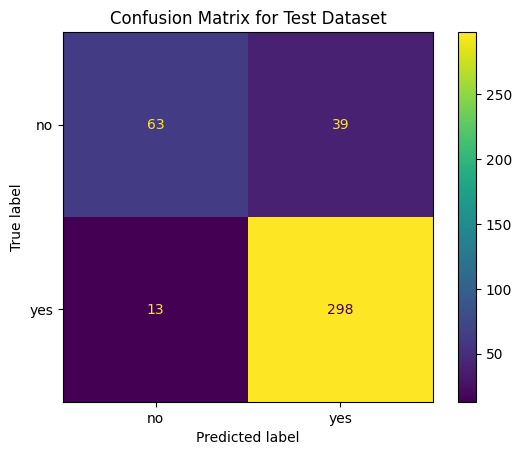

In [38]:
ConfusionMatrixDisplay.from_estimator(clf, X3_train, y3_train,display_labels=['no','yes'])
plt.title('Confusion Matrix for Training Dataset')
ConfusionMatrixDisplay.from_estimator(clf, X3_test, y3_test,display_labels=['no','yes'])
plt.title('Confusion Matrix for Test Dataset')

I did another KNcClassifier model on the same dataset to compare the performance of the two different models. The model score of test and train are both 0.86, which were pretty good. The KNN model’s performance is very close to logistic regression, with a slightly lower test score.

In [52]:
param={'n_neighbors': range(1,30,2)}
knnclass=KNeighborsClassifier()
grid=GridSearchCV(knnclass, param_grid=param)
grid.fit(X3_train, y3_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2)})

In [53]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=25)

The model score is also very good, and both on the training set and testing set. The KNN model’s performance is very close to logistic regression, with a slightly lower test score.

In [54]:
grid.score(X3_train, y3_train)

0.8649959579628133

In [55]:
grid.score(X3_test, y3_test)

0.8571428571428571

The KNN model slightly underperforms compared to logistic regression. It has a slightly higher false positive rate (47 vs. 40). The difference is not big, though.

Text(0.5, 1.0, 'KN Classifier')

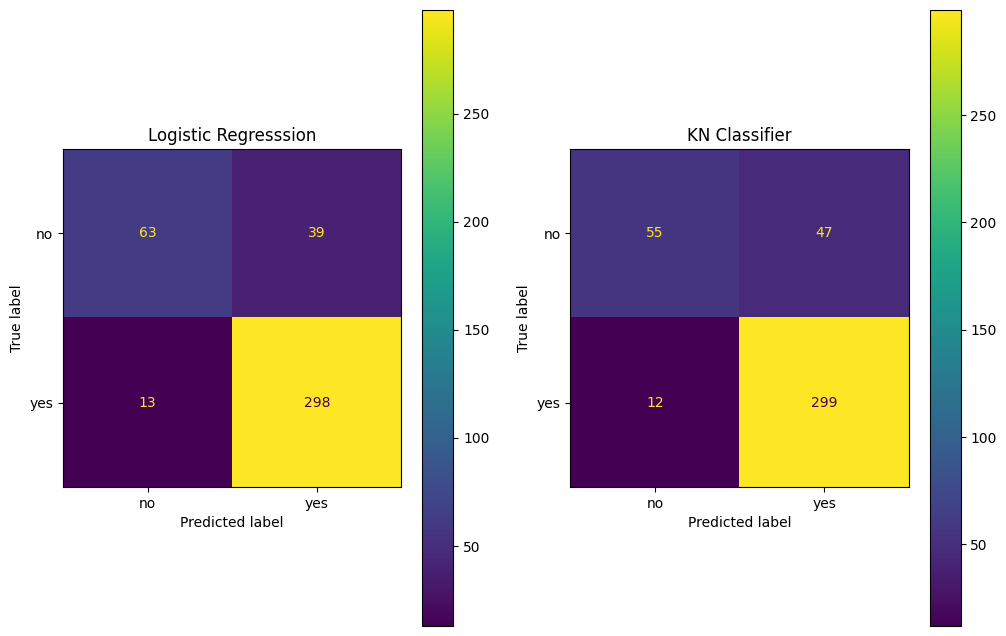

In [56]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
ConfusionMatrixDisplay.from_estimator(clf,X3_test, y3_test, display_labels=['no','yes'], ax=ax[0])
ax[0].set_title("Logistic Regresssion")
ConfusionMatrixDisplay.from_estimator(grid, X3_test,y3_test,display_labels=['no','yes'],ax=ax[1])
ax[1].set_title("KN Classifier")

####Results and Model Comparison

Logistic regression achieves slightly better accuracy and fewer false positives, making it preferable for this scenario due to its simplicity and interpretability. KNN performs comparably but requires hyperparameter tuning to optimize performance.


## Conclusion & Next Steps

#### Conclusion

In this analysis, I examined factors influencing store sales to help small business owners, such as grocery store owners or supermarket managers, make informed decisions to increase revenue. By using predictive models including Linear Regression, KNN, and Logistic Regression, the key findings are as follows:



1.   Product Variety and Store Size emerged as the most significant predictors of higher monthly sales revenue. This highlights the importance of offering a diverse product range and operating larger stores to attract customers.
2.   Employee Efficiency and Promotions Count also contributed positively to sales performance, suggesting that improving staff productivity and running effective promotional campaigns can drive additional revenue.
3.	 Competitor Distance and Marketing Spend showed relatively minor impacts on sales. This implies that while competitor proximity matters, it does not dominate sales outcomes, and marketing spend needs more strategic allocation to ensure effectiveness.

Key Recommendations:
*   Focus on increasing product variety and expanding store size where feasible to boost customer attraction and retention.
*   Improve employee efficiency through training programs and incentives.
*   Design and implement well-planned promotional strategies to maximize impact on revenue.
*   Analyze marketing spend further to ensure it delivers a positive return on investment.


#### Next Steps

To make it more practical and useful, we should consider:

1.  More detailed sales revenue data. The current monthly sales revenue data is most likely an average data. If we could get more about each month, and we can try to understand the dynamics of each factor influencing each other, this could also help us to make more thorough thought decision.
2.  Consider other factors. In our analysis, we only found 2 factors were quite influential. One way to make this analysis more accurate is to collect more data, so we can have a more unbiased dataset. We can also consider more factors, such as: hospitality of store owner, opening hours, and price of products in the store etc.
3.   Incorporate external data. We can include regional economic indicators like GDP, inflation rate, and unemployment rate to understand how macroeconomic conditions impact store sales. Use data on population density, household income, age distribution, and customer preferences to refine location-based recommendations. A more detailed analysis with time series and data throughout time can be done to draw more useful conclusions.